Stacking Ensemble Learning - Beginner's Guide

In [17]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt

from sklearn.ensemble import RandomForestClassifier

from sklearn.model_selection import train_test_split

from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import average_precision_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import roc_curve
from sklearn.metrics import auc

import seaborn as sns
sns.set(style = 'ticks')
df = pd.read_csv('/home/gaio/Documents/GitHub/iod-linux/DATA/train.csv')
df= df.drop(['Name', 'PassengerId', 'Ticket','Embarked','Cabin'], axis=1)
df['Age'] = df['Age'].fillna(df['Age'].median())

encoded= pd.get_dummies(df[['Sex']], drop_first=True)
df = pd.concat([df, encoded], axis=1)
df= df.drop(['Sex'], axis=1)


y_train = df['Survived']
X_train = df.drop('Survived', axis=1)

df1 = pd.read_csv('/home/gaio/Documents/GitHub/iod-linux/DATA/test.csv')
df1= df1.drop(['Name', 'PassengerId', 'Ticket','Embarked','Cabin'], axis=1)
df1['Age'] = df1['Age'].fillna(df['Age'].median())
df1['Fare'] = df1['Fare'].fillna(df['Fare'].median())

encoded1 = pd.get_dummies(df1[['Sex']], drop_first=True)
df1 = pd.concat([df1, encoded1], axis=1)
df1 = df1.drop(['Sex'], axis=1)

X_test = df1

In [5]:
#splitting train data in 2 parts

from sklearn.model_selection import train_test_split
xtraining,xvalid,ytraining,yvalid = train_test_split(X_train,y_train,test_size=0.5)

In [6]:
#importing the packages
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
import xgboost as xgb

#specifying the initial learners
model1 = RandomForestClassifier()
model2 = LogisticRegression()
model3 = xgb.XGBClassifier()

#training the initial learners
model1.fit(xtraining,ytraining)
model2.fit(xtraining,ytraining)
model3.fit(xtraining,ytraining)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)

In [7]:
#making predictions for the validation data
preds1 = model1.predict(xvalid)
preds2 = model2.predict(xvalid)
preds3 = model3.predict(xvalid)

#making predictions for the test data
test_preds1 = model1.predict(X_test)
test_preds2 = model2.predict(X_test)
test_preds3 = model3.predict(X_test)

In [8]:
#making a new dataset for training our final model by stacking the predictions on the validation data
train_stack = np.column_stack((preds1,preds2,preds3))

#making the final test set for our final model by stacking the predictions on the test data
test_stack = np.column_stack((test_preds1,test_preds2,test_preds3))

In [9]:
final_model = RandomForestClassifier()

#training the final model on the stacked predictions
final_model.fit(train_stack,yvalid)



RandomForestClassifier()

In [23]:
final_predictions = final_model.predict(test_stack)

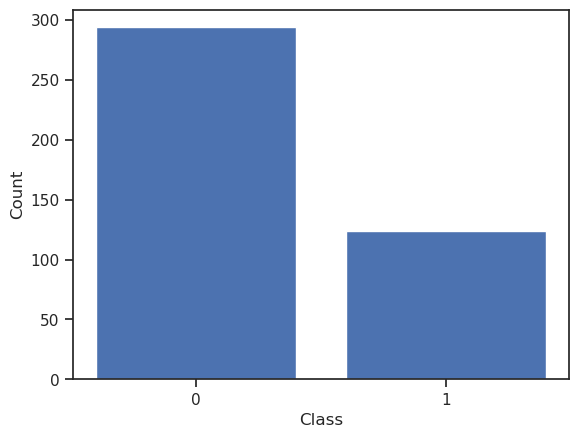

In [25]:

# Compute the frequency of 0s and 1s
counts = np.bincount(final_predictions)

# Plot the counts as a bar chart
plt.bar([0, 1], counts)
plt.xticks([0, 1], ['0', '1'])
plt.xlabel('Class')
plt.ylabel('Count')
plt.show()